# Anomaly Detection Assignments

## 1. Isolation Forests

In [1]:
# 1a. Open the tripadvisor_reviews.csv file
import pandas as pd

data = pd.read_csv('../Data/tripadvisor_reviews.csv')
data.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,User 1,1.93,2.8,3.29,1.62
1,User 2,2.02,3.2,3.66,1.64
2,User 3,2.22,1.8,1.54,1.53
3,User 4,1.45,2.8,1.29,1.57
4,User 5,1.51,2.2,2.18,1.57


In [2]:
# 1b. Remove the user_id column
df = data.drop(columns =['user_id'])

In [3]:
# 1c. View the min and max of each rating
df.describe()

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
count,980.000000,980.000000,980.000000,980.000000
mean,1.893194,2.352612,2.013306,1.532500
std,0.326912,0.478280,0.788607,0.279731
min,1.340000,1.000000,1.130000,1.150000
25%,1.670000,2.080000,1.270000,1.410000
50%,1.830000,2.280000,1.820000,1.500000
75%,2.020000,2.560000,2.572500,1.580000
max,4.220000,4.640000,4.620000,4.440000


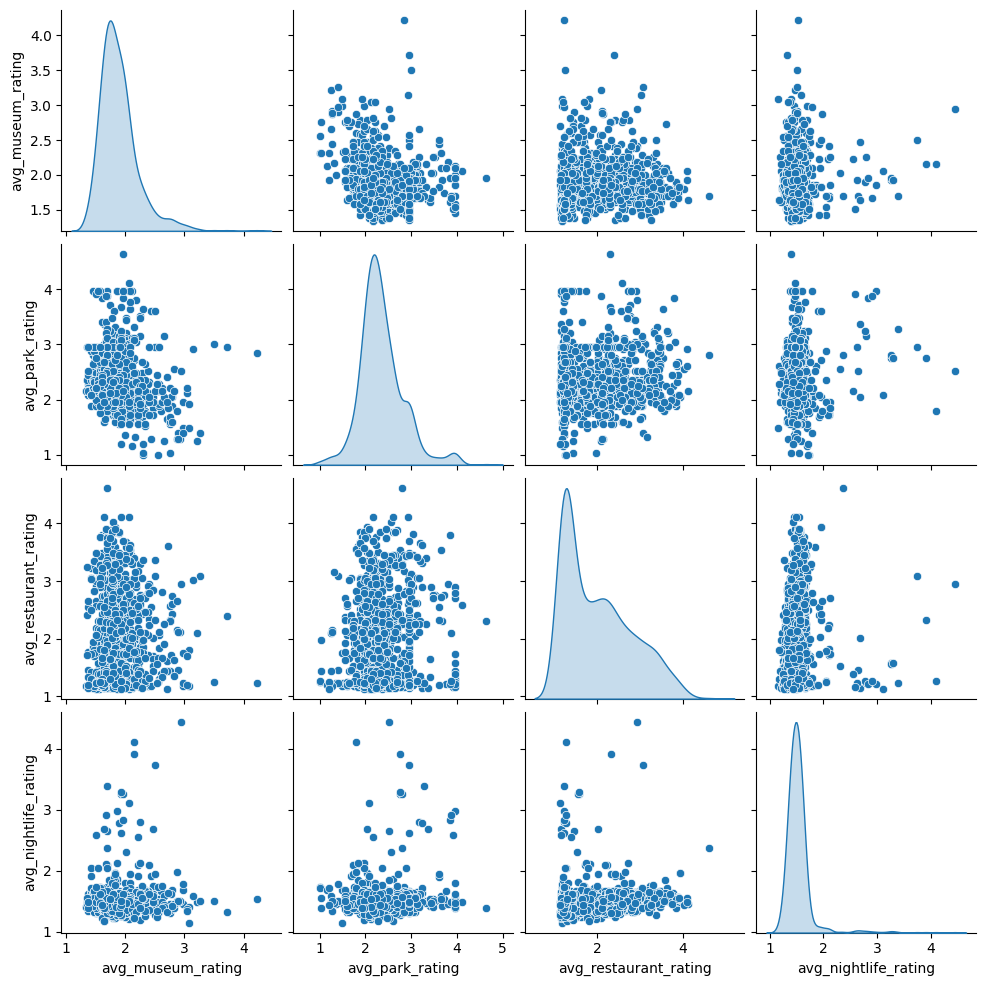

In [4]:
# 2. Visualize the data using a seaborn pair plot
import seaborn as sns
sns.pairplot(df, diag_kind='kde')

In [5]:
# 3. Fit an Isolation Forest model using a contamination of 1%
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
model.fit(df)

anomaly_scores = model.decision_function(df)

In [6]:
anomalies = model.predict(df)
anomalies

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [7]:
df['anomaly_scores'] = anomaly_scores
df['anomalies'] = anomalies

In [8]:
df.sort_values('anomalies').head(15)

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomalies
903,1.67,3.88,1.26,2.91,-0.020821,-1
747,1.96,3.84,1.21,2.83,-0.013486,-1
728,1.86,3.96,1.21,2.98,-0.034782,-1
666,2.95,2.52,2.94,4.44,-0.083671,-1
592,1.70,3.28,1.22,3.38,-0.025570,-1
601,2.15,1.80,1.26,4.10,-0.026780,-1
501,3.72,2.96,2.39,1.32,-0.019179,-1
422,1.51,3.92,1.16,2.58,-0.024609,-1
274,2.15,2.76,2.33,3.91,-0.014967,-1
247,2.50,2.96,3.08,3.73,-0.056388,-1


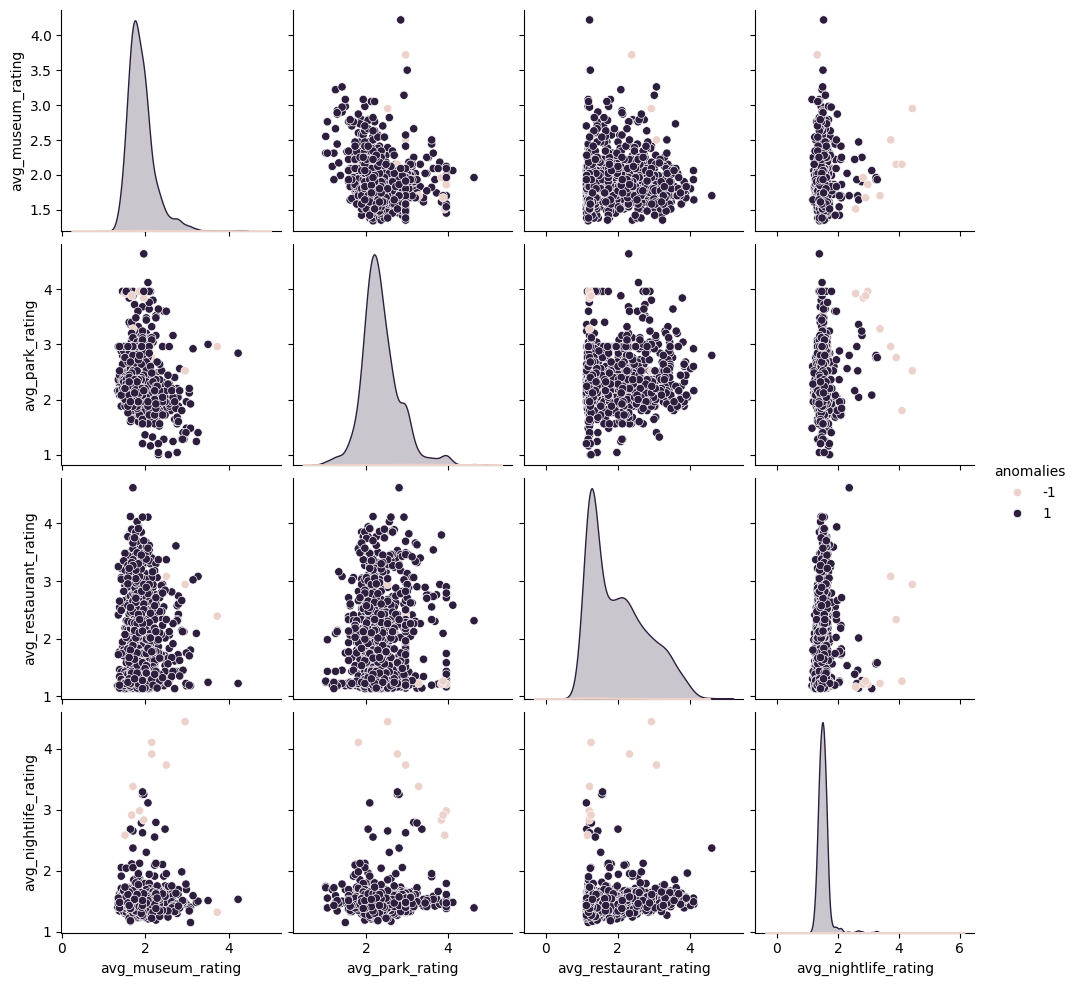

In [9]:
# 4. Visualize the anomalies on the seaborn pair plot
sns.pairplot(df.drop(columns = 'anomaly_scores'), diag_kind='kde', hue = 'anomalies')

In [ ]:
# 5. Where do you notice anomalies in the pair plot?


In [10]:
data.head()

,user_id,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating
0,User 1,1.93,2.8,3.29,1.62
1,User 2,2.02,3.2,3.66,1.64
2,User 3,2.22,1.8,1.54,1.53
3,User 4,1.45,2.8,1.29,1.57
4,User 5,1.51,2.2,2.18,1.57


In [11]:
# 6. Modify the contamination to 0.5% to capture fewer anomalies and visualize the differences
model_05 = IsolationForest(contamination=0.005)

model_05.fit(data.drop(columns = 'user_id'))

anomaly_scores_05 = model_05.decision_function(data.drop(columns = 'user_id'))
anomalies_05 = model_05.predict(data.drop(columns = 'user_id'))


In [12]:
df_05 = data.drop(columns = 'user_id')

In [13]:
df_05['anomaly_scores_05'] = anomaly_scores_05
df_05['anomalies_05'] =  anomalies_05

In [14]:
df_05.sort_values('anomalies_05').head(10)

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores_05,anomalies_05
915,1.70,2.80,4.62,2.37,-0.006074,-1
728,1.86,3.96,1.21,2.98,-0.001672,-1
666,2.95,2.52,2.94,4.44,-0.079272,-1
422,1.51,3.92,1.16,2.58,-0.016193,-1
247,2.50,2.96,3.08,3.73,-0.050613,-1
975,1.74,2.12,1.30,1.53,0.271499,1
974,2.02,3.44,2.89,1.47,0.152058,1
973,1.38,2.96,1.19,1.48,0.173996,1
972,2.22,2.16,1.38,2.55,0.130827,1
971,2.28,2.24,1.14,1.55,0.214874,1


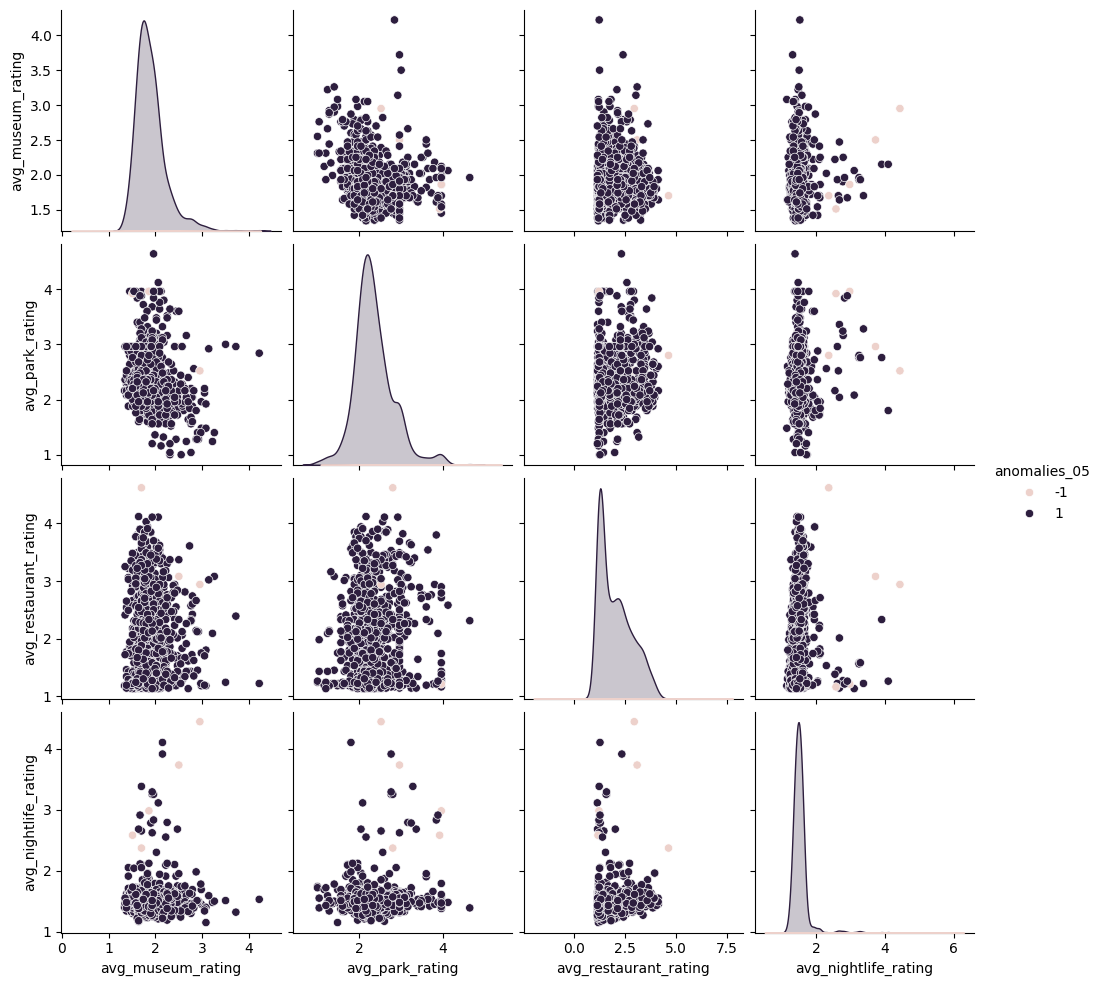

In [15]:
sns.pairplot(df_05.drop(columns = 'anomaly_scores_05'), diag_kind='kde', hue = 'anomalies_05')

## 2. DBSCAN

In [ ]:
# 1. Paste the DBSCAN function from the anomaly detection demo notebook that loops through multiple eps and min_samples values to fit multiple DBSCAN models

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [19]:
df

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomalies
0,1.93,2.80,3.29,1.62,0.198747,1
1,2.02,3.20,3.66,1.64,0.127577,1
2,2.22,1.80,1.54,1.53,0.219123,1
3,1.45,2.80,1.29,1.57,0.202922,1
4,1.51,2.20,2.18,1.57,0.238266,1
...,...,...,...,...,...,...
975,1.74,2.12,1.30,1.53,0.257574,1
976,2.25,1.92,2.12,1.38,0.221956,1
977,1.61,2.32,1.67,1.43,0.264159,1
978,1.93,1.20,1.13,1.43,0.116396,1


In [21]:
# 2. Apply the function on the tourist rating data set
dbscan_results= tune_dbscan(df.drop(columns =['anomaly_scores', 'anomalies']))
dbscan_results.head(10)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,109,584,-0.310168
1,0.1,3,31,740,-0.458483
2,0.1,4,16,797,-0.445806
3,0.1,5,10,850,-0.382044
4,0.1,6,5,899,-0.178858
5,0.1,7,4,921,-0.201923
6,0.1,8,2,943,-0.192131
7,0.1,9,1,951,NaN
8,0.2,2,38,154,-0.390003
9,0.2,3,20,190,-0.345730


In [23]:
# 3. Find the highest silhouette score and note down the eps and min_samples values
dbscan_results.sort_values('Silhouette Score', ascending = False).head(15)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
56,0.8,2,2,7,0.441910
53,0.7,7,2,16,0.405540
42,0.6,4,2,17,0.397147
40,0.6,2,2,14,0.391766
41,0.6,3,2,14,0.391766
43,0.6,5,2,18,0.383635
64,0.9,2,4,3,0.354808
35,0.5,5,2,31,0.344125
37,0.5,7,2,32,0.343935
36,0.5,6,2,31,0.343407


In [ ]:
# eps = 0.8, min_samples = 2, 

In [24]:
# 4. Fit a single DBSCAN model using those eps and min_sample values
dbscan_results_best = DBSCAN(eps = 0.8, min_samples = 2)
dbscan_results_best.fit(df.drop(columns =['anomaly_scores', 'anomalies']))

,eps,0.8
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [26]:
# 5. Note the anomalies (-1) and visualize them on a pair plot
from collections import Counter
Counter(dbscan_results_best.labels_)

Counter({np.int64(0): 971, np.int64(-1): 7, np.int64(1): 2})

In [ ]:
df['anomaly_dbscan'] = dbscan_results_best.labels

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomalies,anomaly_dbscan
0,1.93,2.8,3.29,1.62,0.198747,1,0
1,2.02,3.2,3.66,1.64,0.127577,1,0
2,2.22,1.8,1.54,1.53,0.219123,1,0
3,1.45,2.8,1.29,1.57,0.202922,1,0
4,1.51,2.2,2.18,1.57,0.238266,1,0


In [29]:
df.sort_values('anomaly_dbscan', ascending= True)

,avg_museum_rating,avg_park_rating,avg_restaurant_rating,avg_nightlife_rating,anomaly_scores,anomalies,anomaly_dbscan
915,1.70,2.80,4.62,2.37,0.003909,1,-1
795,3.14,2.92,3.02,1.59,0.050329,1,-1
666,2.95,2.52,2.94,4.44,-0.083671,-1,-1
601,2.15,1.80,1.26,4.10,-0.026780,-1,-1
501,3.72,2.96,2.39,1.32,-0.019179,-1,-1
...,...,...,...,...,...,...,...
17,1.61,2.96,3.49,1.66,0.146971,1,0
16,1.86,2.04,2.76,1.34,0.227031,1,0
977,1.61,2.32,1.67,1.43,0.264159,1,0
322,4.22,2.84,1.22,1.53,0.007408,1,1


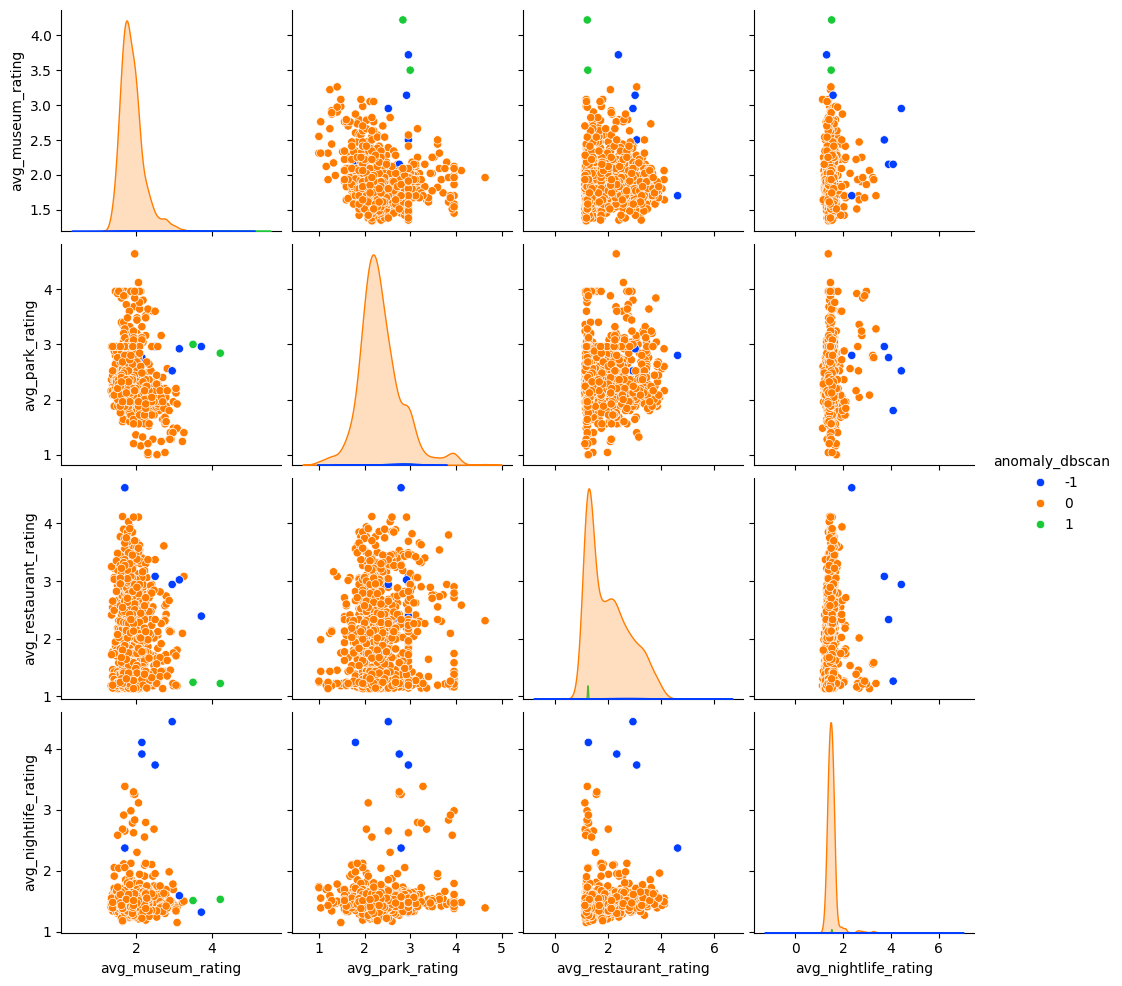

In [30]:
sns.pairplot(df.drop(columns = ['anomaly_scores', 'anomalies']), hue ='anomaly_dbscan', palette='bright')